In [201]:
import pandas as pd
import scanpy as sc
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

pathin_mapmycells="/home/hpc/lianyun.huang/singlecell/final4/output/output_mapmycells/raw/csvs"
pathin_data="/project/genomics/lianyun/CaIPACL/cp_from_homepath/data_final4"

pathout="/home/hpc/lianyun.huang/singlecell/final4/output/output_mapmycells"


In [202]:
title="26" # 11

In [203]:
# read mapmycell results
data=pd.read_csv(pathin_mapmycells+"/sample"+title+".csv",skiprows=4)

keep_cols = ["cell_id", "class_name", "subclass_name", "cluster_name"]
data = data[keep_cols]

In [204]:
# read adata
if title in ["14","15","23","24","25"]:
    adata=sc.read_h5ad(pathin_data + "/finalsoupx_sample"+ title +".h5ad")
else:
    adata=sc.read_h5ad(pathin_data + "/soupx_scrublet_sample"+ title +".h5ad")
    
# formatting
adata.obs.reset_index(inplace=True)
adata.obs = adata.obs.rename(columns={'index': 'cell_id'})

# Perform a left join on 'cell_id' (transfer the labels)
adata.obs = adata.obs.merge(data, on='cell_id', how='left')

adata.obs.to_csv(path_or_buf=pathout+"/mapmycells_"+title+".csv",sep="\t", index=False, header=True,quoting=None)
adata.obs

,cell_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,class_name,subclass_name,cluster_name
0,AAACGAAAGACAGTCG-1,14,2.708050,34.0,3.555348,100.0,4.0,1.609438,11.764706,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1
1,AAACGAATCAAACCTG-1,18,2.944439,23.0,3.178054,100.0,4.0,1.609438,17.391304,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0004 CLA-EPd-CTX Car3 Glut_1
2,AAAGAACAGGAACATT-1,17,2.890372,21.0,3.091043,100.0,1.0,0.693147,4.761905,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1
3,AAAGGGCCACCCATAA-1,16,2.833213,20.0,3.044523,100.0,3.0,1.386294,15.000001,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1
4,AAAGGTAAGGAAGTAG-1,17,2.890372,22.0,3.135494,100.0,4.0,1.609438,18.181818,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,TTTCCTCTCCCAGGAC-1,20,3.044522,25.0,3.258096,100.0,1.0,0.693147,4.000000,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1
985,TTTCGATAGCTAGAGC-1,16,2.833213,21.0,3.091043,100.0,2.0,1.098612,9.523809,False,False,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0528 OB Meis2 Thsd7b Gaba_5
986,TTTGGTTGTTGTGCAT-1,19,2.995732,21.0,3.091043,100.0,2.0,1.098612,9.523809,False,False,01 IT-ET Glut,025 CA2-FC-IG Glut,0401 CA2-FC-IG Glut_2
987,TTTGTTGAGGTTTGAA-1,18,2.944439,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,01 IT-ET Glut,015 ENTmv-PA-COAp Glut,0252 ENTmv-PA-COAp Glut_1


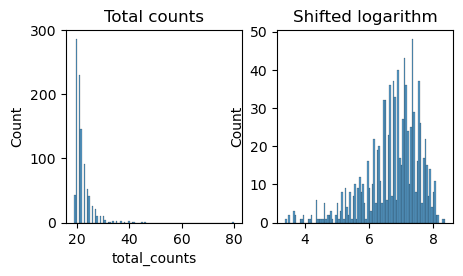

In [205]:
# normalization
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

# visualise normalization
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
p1 = sb.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sb.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [206]:
# dimension reduction for plotting 
sc.pp.pca(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


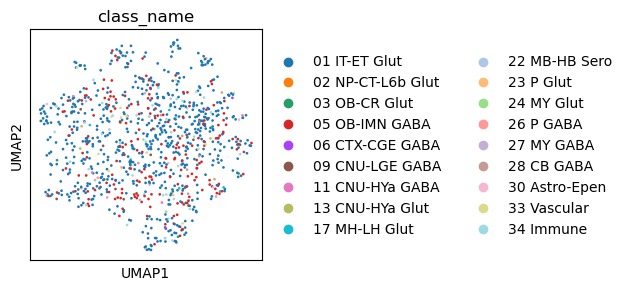

In [207]:
with plt.rc_context({'figure.figsize': (3, 3)}):
    fig=sc.pl.umap(adata, color= ["class_name"], size=15,show=False)
    plt.savefig(pathout+"/mapmycells_umap_"+title+".pdf",bbox_inches='tight')

In [208]:
# make a broader cell type

adata.obs["broadtype"]=adata.obs["class_name"]

adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Glut'),"Glut",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('GABA'),"GABA",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Dopa'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Sero'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Astro-Epen'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('OPC-Oligo'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('OEC'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Vascular'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Immune'),"Others",adata.obs["broadtype"])


adata.obs

,cell_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,class_name,subclass_name,cluster_name,broadtype
0,AAACGAAAGACAGTCG-1,14,2.708050,34.0,3.555348,100.0,4.0,1.609438,11.764706,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut
1,AAACGAATCAAACCTG-1,18,2.944439,23.0,3.178054,100.0,4.0,1.609438,17.391304,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0004 CLA-EPd-CTX Car3 Glut_1,Glut
2,AAAGAACAGGAACATT-1,17,2.890372,21.0,3.091043,100.0,1.0,0.693147,4.761905,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut
3,AAAGGGCCACCCATAA-1,16,2.833213,20.0,3.044523,100.0,3.0,1.386294,15.000001,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut
4,AAAGGTAAGGAAGTAG-1,17,2.890372,22.0,3.135494,100.0,4.0,1.609438,18.181818,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,TTTCCTCTCCCAGGAC-1,20,3.044522,25.0,3.258096,100.0,1.0,0.693147,4.000000,False,False,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut
985,TTTCGATAGCTAGAGC-1,16,2.833213,21.0,3.091043,100.0,2.0,1.098612,9.523809,False,False,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0528 OB Meis2 Thsd7b Gaba_5,GABA
986,TTTGGTTGTTGTGCAT-1,19,2.995732,21.0,3.091043,100.0,2.0,1.098612,9.523809,False,False,01 IT-ET Glut,025 CA2-FC-IG Glut,0401 CA2-FC-IG Glut_2,Glut
987,TTTGTTGAGGTTTGAA-1,18,2.944439,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,01 IT-ET Glut,015 ENTmv-PA-COAp Glut,0252 ENTmv-PA-COAp Glut_1,Glut


In [209]:
adata.write(pathin_data+"/mapmycellannotation_sample"+title+".h5ad")

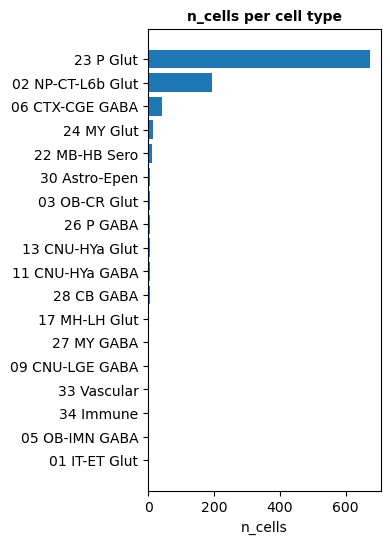

In [210]:
# Count the number of rows for each 'cell_type'
cell_type_counts = adata.obs['class_name'].value_counts()

# Create a bar plot
plt.rcParams["figure.figsize"] = (3,6)

fig, ax = plt.subplots()
ax.barh(cell_type_counts.index,cell_type_counts.values[::-1])

# Set X and Y axis labels and a title
plt.xlabel('n_cells')
plt.title('n_cells per cell type',fontsize=10, fontweight="bold")

plt.savefig(pathout+"/mapmycells_ncells_"+title+".pdf", bbox_inches='tight')


# Show the plot
plt.show()

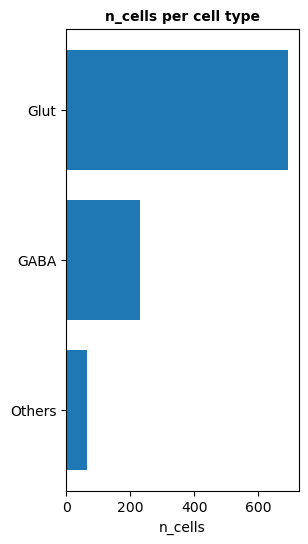

In [211]:
# Count the number of rows for each 'cell_type'
cell_type_counts = adata.obs['broadtype'].value_counts()

# Create a bar plot
plt.rcParams["figure.figsize"] = (3,6)

fig, ax = plt.subplots()
ax.barh(cell_type_counts.index,cell_type_counts.values)
ax.invert_yaxis()

# Set X and Y axis labels and a title
plt.xlabel('n_cells')
plt.title('n_cells per cell type',fontsize=10, fontweight="bold")

plt.savefig(pathout+"/mapmycells_broadtype_ncells_"+title+".pdf", bbox_inches='tight')


# Show the plot
plt.show()

In [212]:
container=[]

for i in range(11,27):
    tmp=pd.read_csv(pathout+"/mapmycells_"+str(i)+".csv",sep="\t")
    tmp=tmp.sort_values(by="class_name")
    tmp=tmp['class_name'].value_counts().index.tolist()
    tmp=sorted(tmp)
    tmp=["sample"+str(i)]+tmp
    
    container.append(tmp)
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/hpc/lianyun.huang/singlecell/final4/output/output_mapmycells/mapmycells_26.csv'

In [ ]:
maxlength=max(len(sublist) for sublist in container)

#merge=[sublist + [None] * (maxlength - len(sublist)) for sublist in container]
merge=[sublist + [None] * (maxlength - len(sublist)) for sublist in container]

merge=pd.DataFrame(merge)

merge=merge.transpose()

merge.columns=merge.iloc[0]
merge=merge[1:]

merge.to_csv(pathout+"/celltype_table_individualsample.csv",sep="\t", index=False, header=True,quoting=None)


merge